# Polinominal Regression

## Predict Wine Quality

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataframe = pd.read_csv(r"data input\wine_quality_white.csv", sep = ";")

In [3]:
dataframe.head(30)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.00,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,8.1,0.22,0.43,1.50,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


# dimension

In [4]:
dataframe.shape

(4898, 12)

# Data preprocessing

In [5]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [6]:
missing_perc =  dataframe.isna().sum() / len(dataframe) #check missing value
missing_perc

fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
dtype: float64

In [7]:
dataframe.describe() 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


# sperate  and scale data


In [8]:
x = dataframe.drop("quality", axis=1)
y = dataframe["quality"]

x.shape, y.shape

((4898, 11), (4898,))

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# scale and normalize in one step
x_scaled = scaler.fit_transform(x)

In [10]:
from sklearn.model_selection import train_test_split



x_train, x_test,y_train,y_test = train_test_split(x_scaled, y, test_size=0.33, random_state=0)

# Build Model

In [11]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3)
x_poly = poly.fit_transform(x_train)
poly.fit(x_train, y_train)

PolynomialFeatures(degree=3)

In [12]:
from sklearn.linear_model import LinearRegression
import time
start = time.process_time()
model = LinearRegression()
model.fit(x_poly, y_train)
print("time model training :",time.process_time() - start)

time model training : 0.296875


# Evaluate and Predict Model

In [13]:
model.score(x_poly,y_train)

0.4919148475411037

In [14]:

real_value = y_test.to_numpy()
y_pred = model.predict(poly.fit_transform(x_test))
print(f'model predict : {y_pred[1]} and the real value : {real_value[1]}')
print(f'model predict : {y_pred[4]} and the real value : {real_value[4]}')
print(f'model predict : {y_pred[9]} and the real value : {real_value[9]}')

model predict : 5.520602751386573 and the real value : 6
model predict : 5.661185851981469 and the real value : 5
model predict : 5.275682737114634 and the real value : 5


In [15]:
from sklearn.metrics import mean_squared_error 

mse_test = mean_squared_error(y_test, y_pred)
mse_test



142.57331067401913

In [16]:
np.sqrt(mean_squared_error(y_test,y_pred))

11.940406637716285

In [17]:
from sklearn.metrics import mean_absolute_error

mae_test = mean_absolute_error(y_test, y_pred)
mae_test

0.907682312353937

In [18]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)


-174.79564770826374

In [19]:
from statsmodels.api import OLS
OLS(y_train,x_train).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                quality   R-squared (uncentered):                   0.009
Model:                            OLS   Adj. R-squared (uncentered):              0.006
Method:                 Least Squares   F-statistic:                              2.770
Date:                Fri, 19 Mar 2021   Prob (F-statistic):                     0.00139
Time:                        17:17:09   Log-Likelihood:                         -10497.
No. Observations:                3281   AIC:                                  2.102e+04
Df Residuals:                    3270   BIC:                                  2.108e+04
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.3228      0.192      1.682      0.093      -0.053       0.699
x2            -0.1214      0.110     -1.102      0.271      -0.337       0.095
x3            -0.1451      0.113     -1.281      0.200      -0.367       0.077
x4             0.8962      0.434      2.064      0.039       0.045       1.748
x5             0.0722      0.115      0.627      0.530      -0.153       0.298
x6             0.1016      0.139      0.733      0.464      -0.170       0.373
x7             0.0977      0.159      0.615      0.538      -0.214       0.409
x8            -1.3581      0.683     -1.988      0.047      -2.698      -0.018
x9             0.2771      0.166      1.667      0.096      -0.049       0.603
x10            0.1735      0.110      1.580      0.114      -0.042       0.389
x11           -0.1086      0.351     -0.309      0.757      -0.797       0.580
==============================================================================
Omnibus:                      107.527   Durbin-Watson:                   0.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              286.624
Skew:                           0.062   Prob(JB):                     5.76e-63
Kurtosis:                       4.443   Cond. No.                         15.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Feature Selection & Pearson Corelation

In [20]:
pearsoncorr = dataframe.corr(method='pearson')
pearsoncorr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


In [21]:
import seaborn as snb

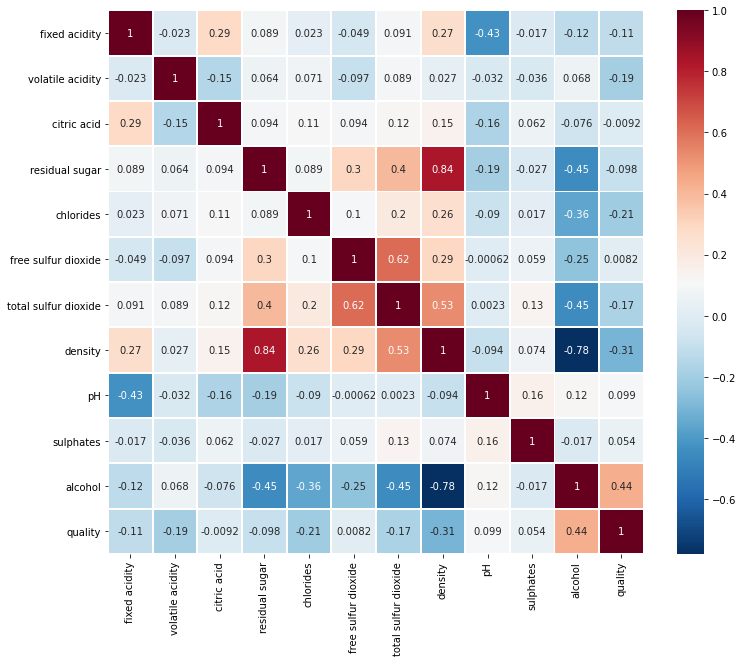

In [22]:
plt.figure(figsize=(12,10))
snb.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.9)

# Find The High Corelation Features

In [23]:
def pearsonCorrelation(data, threshold):
    col_pearsoncorr = set()  # use set method to manipulate corr columns
    corr_matrix = data.corr(method='pearson') #pearson corr method
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value because of negatif corr value
                colname = corr_matrix.columns[i]  # columns names that we want
                col_pearsoncorr.add(colname)
    return col_pearsoncorr

In [24]:
pearsoncorr_features = pearsonCorrelation(dataframe, 0.6)
len(set(pearsoncorr_features))

3

In [25]:
pearsoncorr_features

{'alcohol', 'density', 'total sulfur dioxide'}

C:\Users\ferha\anaconda3\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


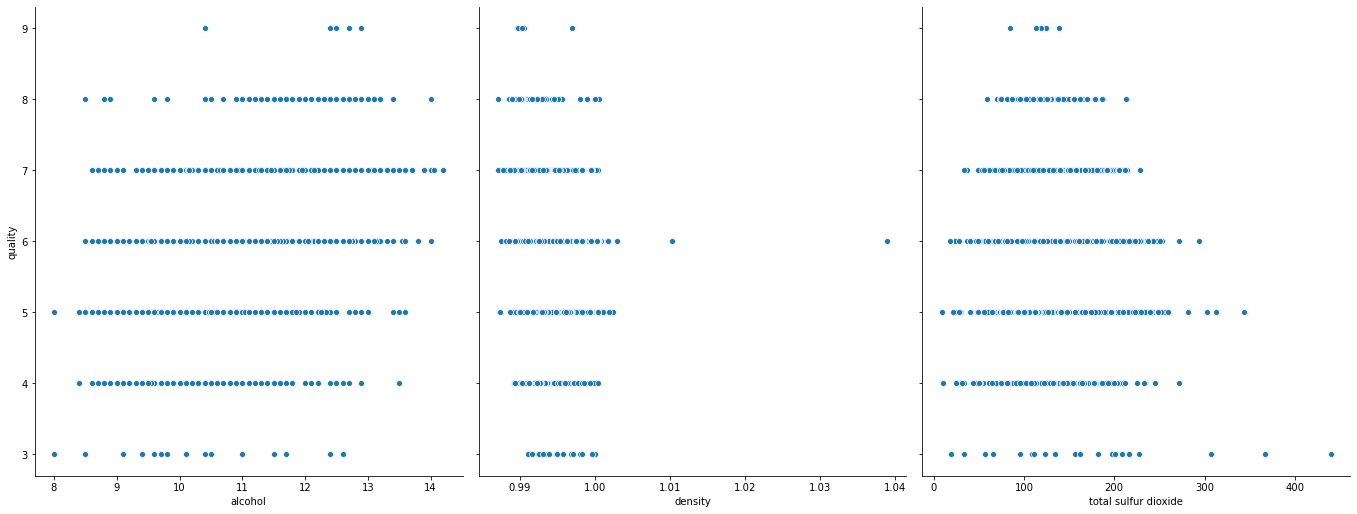

In [26]:
colors = {'alcohol':'r', 'density':'g', 'total sulfur dioxide':'b'}
snb.pairplot(dataframe, x_vars=['alcohol','density','total sulfur dioxide'], y_vars='quality', size=7, aspect=0.9)

# Drop the High Corelation Features

In [27]:
fet_corr = dataframe.drop(['alcohol', 'density', 'total sulfur dioxide', 'quality'], axis=1)
fet_corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,pH,sulphates
0,7.0,0.27,0.36,20.7,0.045,45.0,3.00,0.45
1,6.3,0.30,0.34,1.6,0.049,14.0,3.30,0.49
2,8.1,0.28,0.40,6.9,0.050,30.0,3.26,0.44
3,7.2,0.23,0.32,8.5,0.058,47.0,3.19,0.40
4,7.2,0.23,0.32,8.5,0.058,47.0,3.19,0.40
...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,3.27,0.50
4894,6.6,0.32,0.36,8.0,0.047,57.0,3.15,0.46
4895,6.5,0.24,0.19,1.2,0.041,30.0,2.99,0.46
4896,5.5,0.29,0.30,1.1,0.022,20.0,3.34,0.38


# Build Model Again without High Corelation Features

In [28]:
xc_scaled = scaler.fit_transform(fet_corr)

In [29]:

xc_train, xc_test,yc_train,yc_test = train_test_split(xc_scaled, y, test_size=0.33, random_state=10)
    
    
    

In [30]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3)
xc_poly = poly.fit_transform(xc_train)
poly.fit(xc_train, yc_train)


PolynomialFeatures(degree=3)

In [31]:
from sklearn.linear_model import LinearRegression
start2 = time.process_time()

model2 = LinearRegression()
model2.fit(xc_poly, yc_train)

print("time model training :",time.process_time() - start2)

time model training : 0.09375


In [32]:
model2.score(xc_poly,yc_train)

0.3295324899232114

As a result ,We compared two situations that is using with high corelation features and  without high corelation features . The final performance of model is decreased but time was increased. Our model may not good at this problem. So , try other machine learning algorithms. 